In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%writefile dataset.yaml
train: /content/drive/MyDrive/indian-cars-dataset/train.txt
val: /content/drive/MyDrive/indian-cars-dataset/val.txt

nc: 1

names: ['license_plate']

Overwriting dataset.yaml


In [ ]:
%cd models
!cat yolov5s.yaml
%cd ..

/content/yolov5/models
# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat b

In [ ]:
pip install wandb

In [ ]:
!python train.py --batch 32 --epochs 100  --data dataset.yaml --weights yolov5s.pt --cache

Actual: 


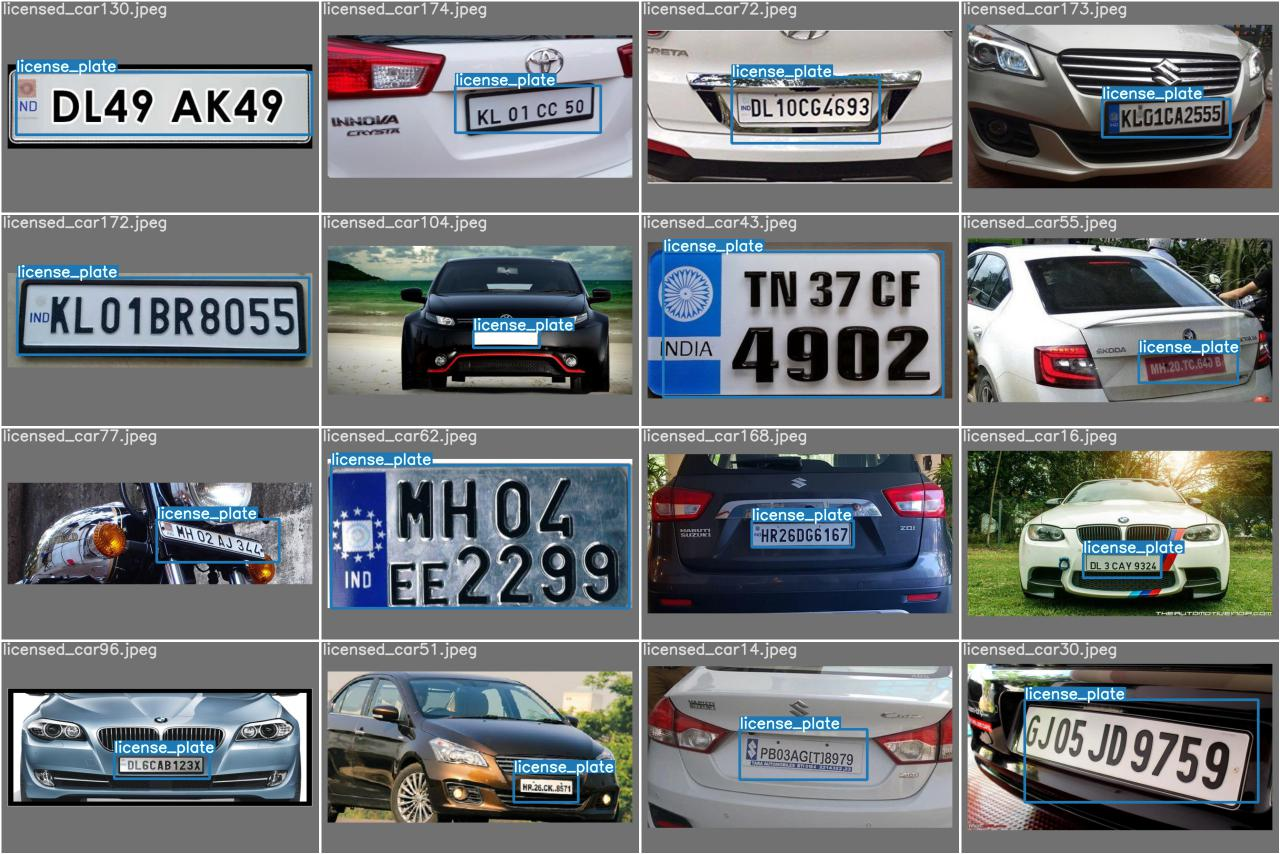

In [ ]:
from IPython.display import Image

print("Actual: ")
Image('/content/yolov5/runs/train/exp2/test_batch0_labels.jpg',width=600)

Prediction: 


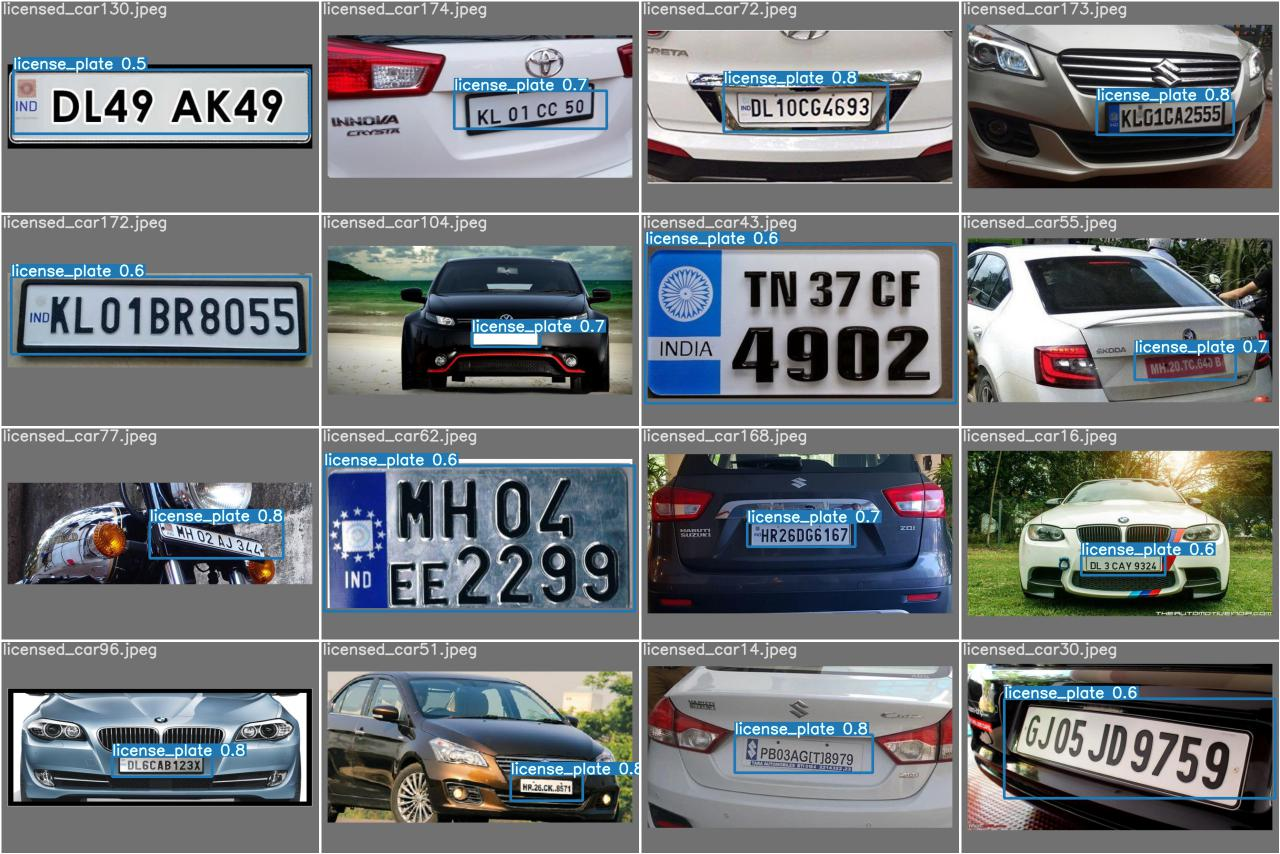

In [ ]:
print("Prediction: ")
Image('/content/yolov5/runs/train/exp2/test_batch0_pred.jpg',width=600)

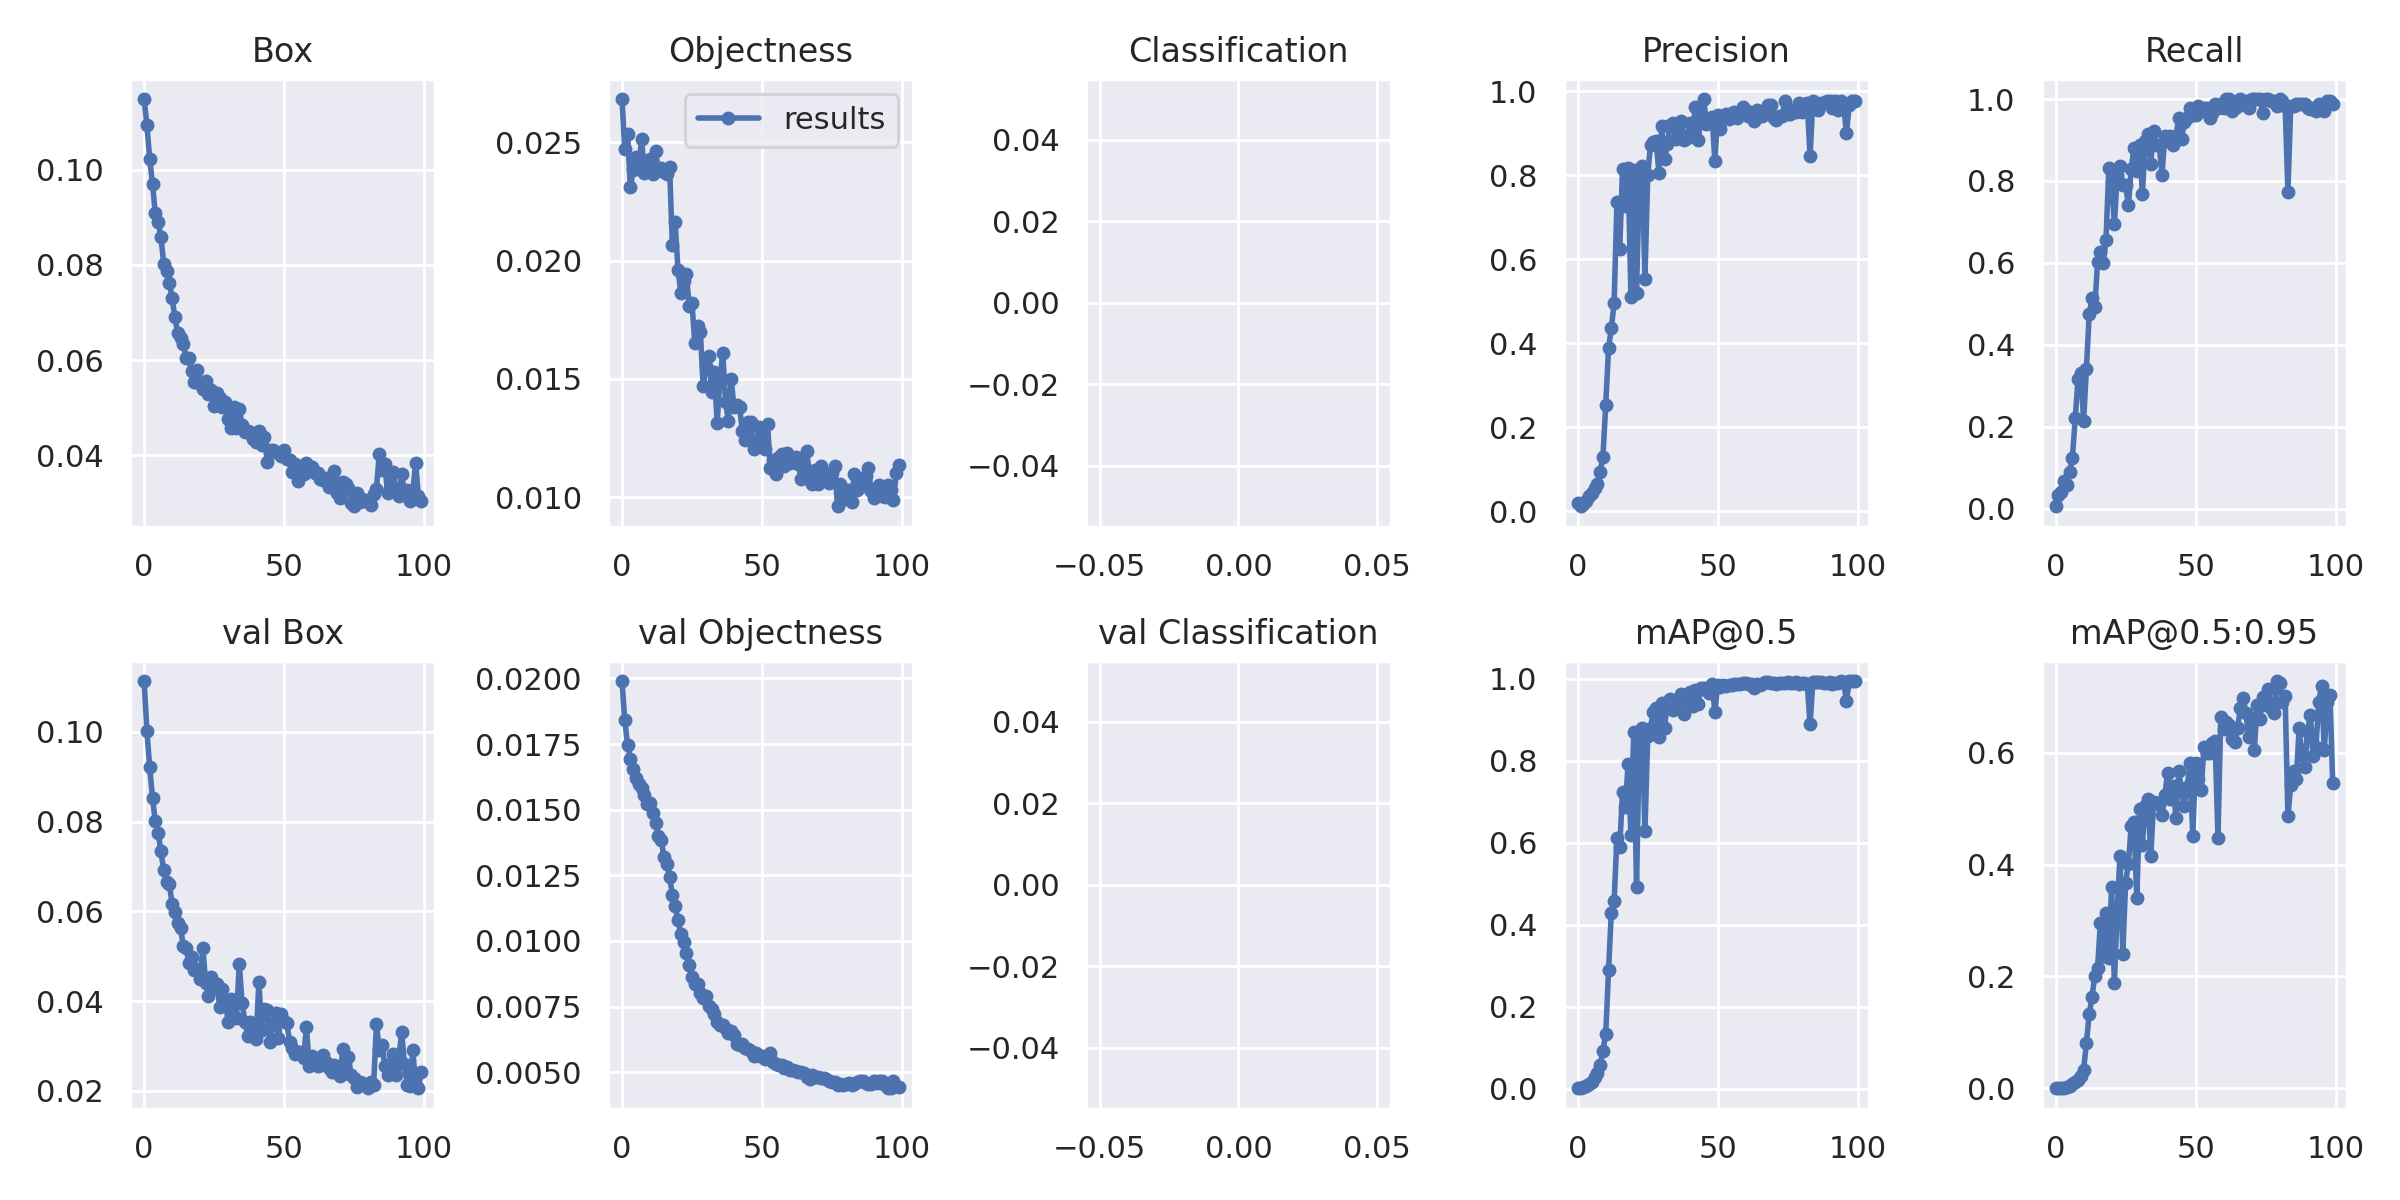

In [ ]:
Image('/content/yolov5/runs/train/exp2/results.png',width=600)

In [ ]:
test_img='/content/drive/MyDrive/car-dataset/images/Cars1.png'
!python detect.py --source {test_img} --weights /content/yolov5/runs/train/exp/weights/best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/car-dataset/images/Cars1.png', update=False, view_img=False, weights=['/content/yolov5/runs/train/exp/weights/best.pt'])
YOLOv5 🚀 v4.0-179-gb8b8629 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/drive/MyDrive/car-dataset/images/Cars1.png: 416x640 1 license_plate, Done. (0.011s)
Results saved to runs/detect/exp
Done. (0.484s)


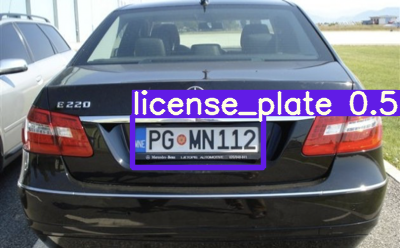

In [ ]:
Image('/content/yolov5/runs/detect/exp/Cars1.png',width=400)

In [ ]:
!zip -r /content/file.zip /content/yolov5